### Project Overview
&nbsp;
<div style='text-align:justify'>The Boston housing market is highly competitive, and you want to be the best real estate agent in the area. To compete with your peers, you decide to leverage a few basic machine learning concepts to assist you and a client with finding the best selling price for their home. Luckily, you’ve come across the Boston Housing dataset which contains aggregated data on various features for houses in Greater Boston communities, including the median value of homes for each of those areas. Your task is to build an optimal model based on a statistical analysis with the tools available. This model will then be used to estimate the best selling price for your clients' homes.</div>

In [3]:
# Import libraries necessary for this project
import warnings; warnings.simplefilter('ignore')
import numpy as np
import pandas as pd

# Import sklearn training and testing data splitter
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
import seaborn as sns
import visuals as vs


%matplotlib inline
sns.set_style("whitegrid")

# Load the Boston Housing Dataset
boston = pd.read_csv('Dataset/BostonHousing.csv')
boston.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [4]:
prices = boston['MEDV']
features = boston.drop(['MEDV'], axis=1)
print(features.head())
print(f"Boston Housing Dataset has {boston.shape[0]} data points with {boston.shape[1]} variables each.")

      RM  LSTAT  PTRATIO
0  6.575   4.98     15.3
1  6.421   9.14     17.8
2  7.185   4.03     17.8
3  6.998   2.94     18.7
4  7.147   5.33     18.7
Boston Housing Dataset has 489 data points with 4 variables each.


### Data Exploration

In [5]:
# Minimum Price of the Data
minimum_price = np.min(prices)

# Maximum Price of the Data
maximum_price = np.max(prices)

# Mean Price of the Data
mean_price = np.mean(prices)

# Median Price of the Data
median_price = np.median(prices)

# Standard Deviation of Prices of the Data
std_price = np.std(prices)

# Calculated Stats
print(f"Stats for Boston Housing Dataset: ")
print(f"Minimum Price: $ {minimum_price:.2f}")
print(f"Maximum Price: $ {maximum_price:.2f}")
print(f"Mean Price: $ {mean_price:.2f}")
print(f"Median Price: $ {median_price:.2f}")
print(f"Standard Deviation Price: $ {std_price:.2f}")

Stats for Boston Housing Dataset: 
Minimum Price: $ 105000.00
Maximum Price: $ 1024800.00
Mean Price: $ 454342.94
Median Price: $ 438900.00
Standard Deviation Price: $ 165171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: 

'RM', 'LSTAT', and 'PTRATIO'. For each data point (neighborhood):

'RM' is the average number of rooms among homes in the neighborhood.

'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).

'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.

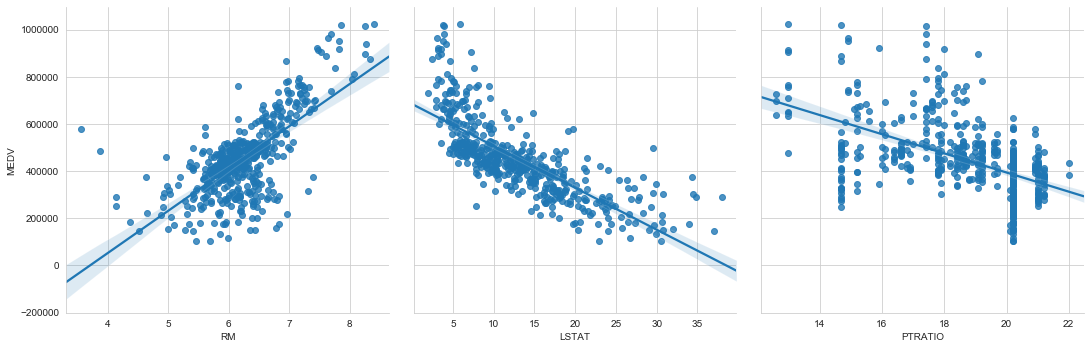

In [6]:
# Linear regression could be used to justify the intuition that the gradient is positive for a positive relationship and negative for a negative relationship.
sns.pairplot(boston, x_vars=['RM', 'LSTAT', 'PTRATIO'], y_vars=['MEDV'], height=5, kind='reg')
plt.show()

### Intuition
&nbsp;
<div style='text-align:justify'>
    
**RM**: An increase in the value of RM will lead to an increase in the value of MEDV. This its obvious and confirmed with above statistics and can also be confirmed with the help of correlation, a home with more number of rooms must be more expensive than a home with less number of rooms.

**LSTAT**: An increase in the value of LSTAT will lead to decrease in the value of MEDV. A lower class homeowner might not be able to afford expensive houses. So you would expect them to leave in cheaper home.

**PTRATIO**: 'PTRATIO' is negatively correlated with the price. A lower 'LSTAT' means that teacher could pay more attention to each of students which indicates a better education, so that would be more expensive.
</div>

In [7]:
# Justifying with Pearson's Coefficient
boston[['RM','MEDV']].corr(method='pearson')
# The Pearson Coeff r=0.697209 > 0, which indicates positive correlation. Hence as RM increases MEDV increases.

,RM,MEDV
RM,1.000000,0.697209
MEDV,0.697209,1.000000


In [8]:
# Justifying with Pearson's Coefficient
boston[['LSTAT','MEDV']].corr(method='pearson')
# The Pearson Coeff r=-0.76067 < 0, which indicates negative correlation. Hence as LSTAT increases MEDV decreases.

,LSTAT,MEDV
LSTAT,1.00000,-0.76067
MEDV,-0.76067,1.00000


In [9]:
# Justifying with Pearson's Coefficient
boston[['PTRATIO','MEDV']].corr(method='pearson')
# The Pearson Coeff r=-0.519034 < 0, which indicates negative correlation. Hence as PTRATIO increases MEDV decreases.

,PTRATIO,MEDV
PTRATIO,1.000000,-0.519034
MEDV,-0.519034,1.000000


### Developing a Model

### Implementation: Define a Performance Metric
<div style='text-align:justify'>It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the coefficient of determination, R2, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions.</div>
&nbsp;
<div style='text-align:justify'>
The values for R2 range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the target variable. A model with an R2 of 0 is no better than a model that always predicts the mean of the target variable, whereas a model with an R2 of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the features. A model can be given a negative R2 as well, which indicates that the model is arbitrarily worse than one that always predicts the mean of the target variable.</div>

In [10]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the Score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the predictions for the target variable.

Would you consider this model to have successfully captured the variation of the target variable? Why or why not ?

In [11]:
# Calculate the performance of the model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5,0.0, 2.1,7.8,5.3])
print(f"Model has a coefficient of determination, R^2, of {score:.2f}")

Model has a coefficient of determination, R^2, of 0.92


**Answer:**
$R^{2}$ could be interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable. Since 0.923 is a pretty high value in range 0 to 1, so I think it is successful.

In [12]:
### Implementation: Shuffle and Split Data
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.20, random_state=7)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing
What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Answer**:
By splitting our dataset into training and testing we can validate our model, i.e. measure the accuracy of our training model.

If the entire dataset is used for training, our model will memorize the data and overfitting/under-generalization will occur and our model will not be able to guess answers with accuracy.

If the entire dataset is used for testing, the model will not learn anything and underfitting/over-generalization will occur and again our model will not be able to guess answers with accuracy.

To overcome this we have to split our dataset into a suitable ratio of training and testing data and our model should not see the testing data at all untill the end. This optimizes of model for a good fit and high accuracy leaving the testing data for us to validate the accuracy of our model and avoid error caused by underfitting and overfitting.

### Analyzing Model Performance
&nbsp;
<div style='text-align:justify'>Look at several models learning and testing performances on various subsets of training data. Additionally, investigate one particular algorithm with an increasing 'max_depth' parameter on the full training set to observe how model complexity affects performance. Graphing model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.</div>

#### Learning Curves
&nbsp;
<div style='text-align:justify'>The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R2, the coefficient of determination.</div>

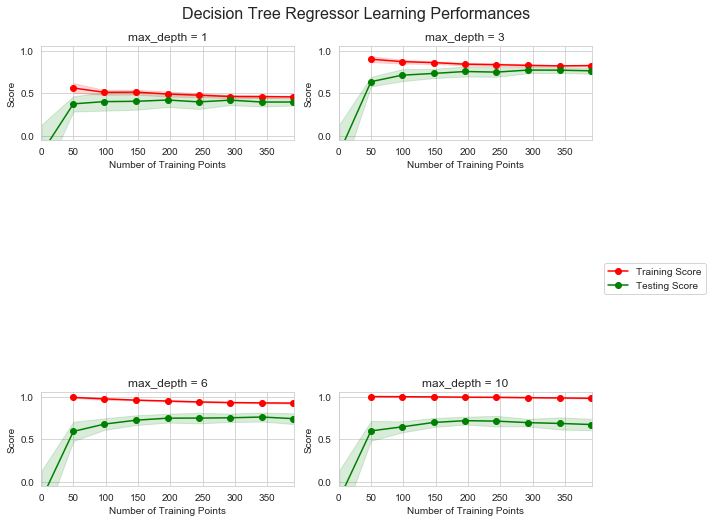

In [13]:
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
Choose one of the graphs above and state the maximum depth for the model.
What happens to the score of the training curve as more training points are added? What about the testing curve?
Would having more training points benefit the model?

**Considering learning curve of model with Maximum Depth = 3**

For given depth value, as more training points are added to the model the score of training curve slowly starts decreasing

There is a instant increase in testing score from 0 to 0.7 for first 50 data points and then it is gradually increasing for further addition of data points.

The training and testing curve seems to be converging to a score of 0.8

Therefore, having more training point will surely not benefits the model.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the learning curves, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the performance_metric function.

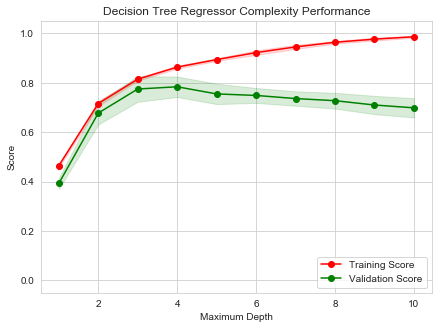

In [14]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
&nbsp;
<div style='text-align:justify'>When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance?</div>
<div style='text-align:justify'>How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?</div>

**Answer** 
<div style='text-align:justify'>When the decision tree model is trained with a maximum depth of 1, it suffers from high bias. This can be seen in the low score (as given by the r2 performance metric) on the training data. The model at this point is not complex enough to represent the underlying relationships in the data and is therefore not able to learn the trends in the data and make accurate predictions. As the complexity of the model increases (as the maximum depth is increased), the bias decreases and the variance increases. At a maximum depth of 10, the decision tree is now exhibiting high variance and overfitting to the training data. This is demonstrated by the high score on the training set and the low score on the testing set. The significant difference in training and validation scores is an indicator of high variance in the model. Above a maximum depth of 6, the model becomes too complex for the task, overfits the training data, and cannot generalize well to the new cases it encounters in the testing set.</div>

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer** 
<div style='text-align:justify'>The optimal maximum depth for the decision tree is 4 as this maximimizes the score on the testing set. I arrived at this conclusion from examining the validation curve and recording the maximum depth where the performance score was greatest for the testing set. At a maximum depth of 4, the decision tree achieves the best balance between bias and variance. The model is able to represent the underlying relationships in the data while avoiding the mistake of overfitting the training data.</div> 

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer**
<div style='text-align:justify'>The grid search technique is a way to evaluate a large number of algorithm hyperparameters and choose the combination that results in the highest score on the chosen performance metric. It can be applied to optimize a learning algorithm by creating a grid of possible combinations for the algorithm, and then calling GridSearchCV in scikit-learn with the classifier (decision tree in this case), the parameter grid, and the scoring method (r2 in this case). GridSearchCV will then test all the parameter combinations and record the set of parameters that achieves the best score. This set of parameters can then be implemented in a final model. Although Grid Search can be computationally expensive, it is often more efficient than evaulating a number of parameter combinations manually.</div>

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer**
<div style='text-align:justify'>K-Fold cross-validation is a method used to avoid overfitting a classifier to a particular training set. K-Fold cv splits the data into k subsets (called folds) on each iteration and trains the model using k-1 of these subsets. The final fold is held out as a test set and used to determine the performance of the trained model. For example, if k=10, then the training data will be split into 10 subsets, and each iteration, the model will be fitted (trained) to 9 of these sets and tested on the 10th set. A total of 10 iterations will be performed with the model is tested on a different fold on each iteration. The final step in the cross validation process is to average the performance metric across all of the iterations to arrive at a single score for assessing the model. K-Fold cv can be used in combination with grid search to ensure that each combination of parameters is thoroughly tested. If cv is not used in Grid Search, the model that returns the highest performance score may simply be the best suited to the particular training data and will not generalize well to new data. K-Fold cross validation can be used to correct this problem by ensuring that all of the parameter combinations are trained and tested multiple times on different sets of the training data. The result of using K-Fold cv together with Grid Search is that the highest scoring model will better suited to generalize to new data. </div>

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [18]:
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=42)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {"max_depth": np.arange(1,11).tolist()}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    print(f"The best score was {grid.best_score_:.4f} for a Decision Tree with a max depth of {grid.best_params_['max_depth']}.")
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [20]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print (f"Parameter 'max_depth' is {reg.get_params()['max_depth']} for the optimal model.")

The best score was 0.7854 for a Decision Tree with a max depth of 4.
Parameter 'max_depth' is 4 for the optimal model.


### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [21]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print (f"Predicted selling price for Client {i+1}'s home: ${price:,.2f}")

Predicted selling price for Client 1's home: $407,232.00
Predicted selling price for Client 2's home: $229,200.00
Predicted selling price for Client 3's home: $979,300.00


**Explanation**
<div style='text-align:justify'>These prices match the hypotheses I formulated in the data exploration section. The model predicts that Client 3's house should be the most expensive which agrees with my intuition as this house is in the upper quartile for number of rooms, in the bottom quartile for percentage of working poor citizens in the neighborhood, and in the bottom quartile for student-to-teacher ratio for schools in the neighborhood. I therefore would predict that this house should have a value near the top of all houses in Boston, which is what the model returns. Client 1's house is closer to the mean than Client 3 in terms of rooms, percentage of citizens considered lower status, and the student to teacher ratio in surrounding schools. I would predict this house has a value very close to the median home price in all of Boston, which is in agreement with the model prediction. Finally, Client 2's house has a low number of rooms, is in a neighborhood with a relatively high level of poverty, and is in a neighborhood with a high student to teacher ratio and consequently should have the lowest value of the three houses. This is what the model predicts as it places the value of the house in the bottom quartile of all houses in Boston. All of the predicted prices are reasonable considering the features of the homes in relation to all the houses in Boston. The graph below shows the predicted prices of the client's house in relation to all of the houses in Boston and the first quartile, median, and third quartile of median housing prices in Boston. </div>

In [23]:
first_quartile = prices.describe()['25%']
median_price = np.median(prices)
third_quartile = prices.describe()['75%']

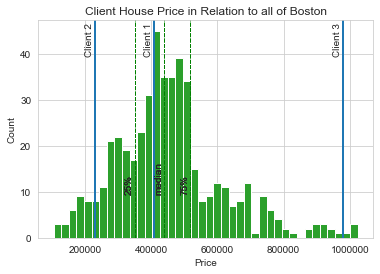

In [29]:
for i, price in enumerate(reg.predict(client_data)):
    plt.hist(prices, bins = 40)
    
    plt.axvline(price, lw = 2)
    
    plt.text(price-30000, 40, 'Client '+str(i+1), rotation = 90)
    
    
    plt.axvline(first_quartile, lw=1, c='g', ls='--')
    
    plt.text(first_quartile-30000, 10, '25%', rotation=90)
    plt.axvline(median_price, lw=1, c='g', ls='--')
    plt.text(median_price-30000, 10, 'median', rotation=90)
    plt.axvline(third_quartile, lw=1, c='g', ls='--')
    plt.text(third_quartile-30000, 10, '75%', rotation=90)
    
    plt.title('Client House Price in Relation to all of Boston')
    plt.ylabel('Count')
    plt.xlabel('Price')

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [31]:
vs.PredictTrials(features, prices, fit_model, client_data)

The best score was 0.7754 for a Decision Tree with a max depth of 4.
Trial 1: $391,183.33
The best score was 0.7809 for a Decision Tree with a max depth of 5.
Trial 2: $419,700.00
The best score was 0.7264 for a Decision Tree with a max depth of 4.
Trial 3: $415,800.00
The best score was 0.7329 for a Decision Tree with a max depth of 4.
Trial 4: $420,622.22
The best score was 0.7442 for a Decision Tree with a max depth of 5.
Trial 5: $418,377.27
The best score was 0.7358 for a Decision Tree with a max depth of 4.
Trial 6: $411,931.58
The best score was 0.8074 for a Decision Tree with a max depth of 4.
Trial 7: $399,663.16
The best score was 0.7854 for a Decision Tree with a max depth of 4.
Trial 8: $407,232.00
The best score was 0.7160 for a Decision Tree with a max depth of 3.
Trial 9: $351,577.61
The best score was 0.8189 for a Decision Tree with a max depth of 4.
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer:**
The decision tree house pricing model should not be implemented in a real-world setting. There are a number of problems with both the data fed into the model and the classifier itself. The data is relatively old and is likely to not be relevant for predicting home prices in 2020. Moreover, the data used in the classifier was composed of only three features, and there may be additional features publically available that are more predictive of housing prices. The value that consumers place on certain home features could also have evolved over the years which would require updating the features fed into the model for training and predicting. In order to create a model that could be successfully implemented today, I would need to have access to recent data with more features describing the houses. Furthermore, the model itself has an issue of variability. The price predicted by the model for a house with identical features differed by as much as $69,000. This may not seem like much to some investors, but it is a serious amount of money to the average homeowner in the United States as it is more than the [`average American household makes in a year`](https://en.wikipedia.org/wiki/Household_income_in_the_United_States). Moreover, the model likely would not generalize well to different cities or regions that have different levels of poverty, different education levels, and different average house sizes. To summarize, I would only rely on this model for pricing houses in Boston in 1978, and even then, I would be skeptical of the predictions. There have been housing price [`prediction models that perform well`](http://www.sciencedirect.com/science/article/pii/S0957417414007325), but nearly all of these are based on a specific geographic region for a specific time frame. It would be difficult to create a model that could accurately predict home prices across the entire United States because the underlying relationships are different in every city, and a model would not be able to account for all the inherent variability. The model developed in this project is impressive at predicting prices on a narrow subset of Boston housing data, but it is best suited for a teaching application using historical data and should not be implemented in the real world.

In [33]:
list(zip(X_train.columns, reg.feature_importances_))

[('RM', 0.6572038430558034),
 ('LSTAT', 0.2992568049008925),
 ('PTRATIO', 0.043539352043304155)]